In [18]:
import argparse
import glob
import multiprocessing as mp
import os
import time
import yaml
import pickle as pkl

def get_parser():
    parser = argparse.ArgumentParser(description='Testing')
    parser.add_argument('--config-file', type=str, default='configs/defualt_config.yaml', metavar= "FILE" ,help='path to config file')
    parser.add_argument("--output", type=str, help="Output path")
    return parser


def get_cfg(config_file):
    with open(config_file, 'r') as f:
        config = yaml.safe_load(f)
    return config


def merge_cfg(default_dict, input_dict):
    merged_dict = default_dict.copy()  # Start with default values.
    merged_dict.update(input_dict)  # Override with user-provided values.
    return merged_dict
    
    
def get_output_path(output_path, config_filename):
    if output_path is None:
        # output file will be a pickle file in the outputs folder
        output_path = os.path.join("outputs", config_filename.split("/")[-1].split(".")[0] + ".pkl")
    else:
        # output file will be a pickle file in the specified folder
        output_path = os.path.join(output_path, config_filename.split("/")[-1].split(".")[0] + ".pkl")
    return output_path    


In [30]:
!python testing.py --config-file configs/default_config.yaml 

This trial has been done before, loading the results...
All trials have been done, loading the results...
{'MODEL': {'method': 'BMP', 'bagging_sub_num': 10, 'depth': 20, 'signal_bag_flag': True, 'signal_bag_percent': 0.7, 'atom_bag_percent': 0.7, 'select_atom_percent': 0, 'replace_flag': True, 'agg_func': 'weight'}, 'TEST': {'N': 100000, 'd': 300, 'true_sparsity': 2, 'noise_level': 0}, 'mse': 0.023050336217078075}
Done!
Results are saved in:  outputs/default_config.pkl


In [32]:
performance_res = pkl.load(open("outputs/default_config.pkl", "rb"))

performance_res

[{'MODEL': {'method': 'BMP',
   'bagging_sub_num': 10,
   'depth': 20,
   'signal_bag_flag': True,
   'signal_bag_percent': 0.7,
   'atom_bag_percent': 0.7,
   'select_atom_percent': 0,
   'replace_flag': True,
   'agg_func': 'weight'},
  'TEST': {'N': 100000, 'd': 300, 'true_sparsity': 2, 'noise_level': 0},
  'mse': 0.023050336217078075}]

## How much time does data generation take?

In [14]:
import time
from data_generation import GaussianDataGenerator

start = time.time()
N = 100000
d = 300
m = 50
noise_scale = 0.1
Data_Generator = GaussianDataGenerator(dictionary_length=N, dictionary_dimensions=d, indice_number=m, noise_level=noise_scale, random_seed=0)
y, dictionary, indices, coefficients, y_perturbed = Data_Generator.shuffle()
end = time.time()

print("Time taken to generate data: ", end - start)

Time taken to generate data:  0.5438969135284424


In [4]:
# Test different values of N

N_list = [100, 200, 500, 1000, 2000, 5000, 10000]
time_list = []

for N_tmp in N_list:
    start = time.time()
    Data_Generator = GaussianDataGenerator(dictionary_length=N_tmp, dictionary_dimensions=d, indice_number=m, noise_level=noise_scale, random_seed=0)
    y, dictionary, indices, coefficients, y_perturbed = Data_Generator.shuffle()
    end = time.time()
    time_list.append(end - start)

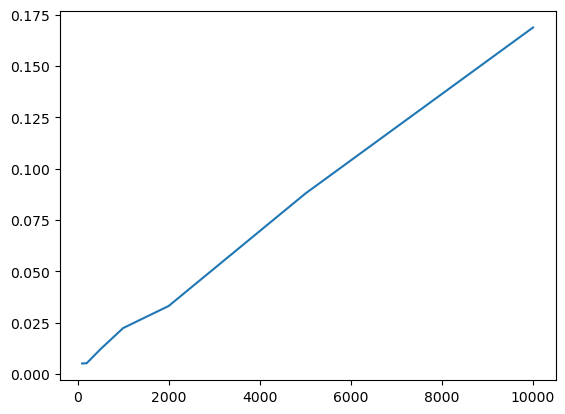

In [5]:
from matplotlib import pyplot as plt

plt.plot(N_list, time_list)

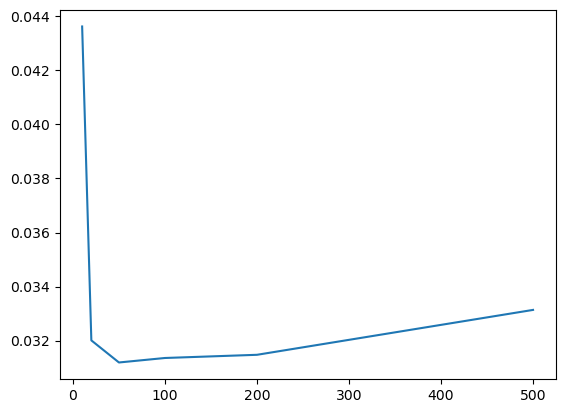

In [10]:
N = 2000
d = 1000
m = 100
noise_scale = 0.1
m_list = [10, 20, 50, 100, 200, 500]
time_list = []

for m_tmp in m_list:
    start = time.time()
    Data_Generator = GaussianDataGenerator(dictionary_length=N, dictionary_dimensions=d, indice_number=m_tmp, noise_level=noise_scale, random_seed=0)
    y, dictionary, indices, coefficients, y_perturbed = Data_Generator.shuffle()
    end = time.time()
    time_list.append(end - start)
    
plt.plot(m_list, time_list)

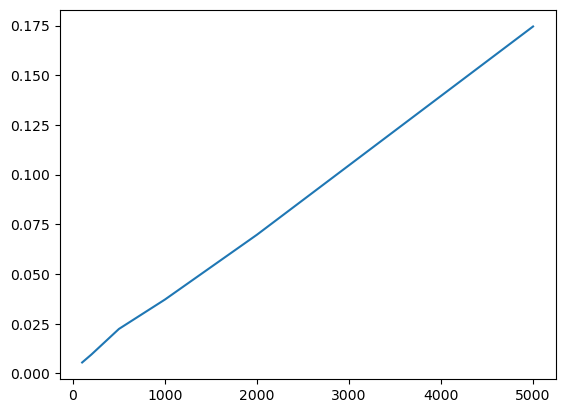

In [13]:
N = 2000
d = 1000
m = 300
noise_scale = 0.1

d_lst = [100, 200, 500, 1000, 2000, 5000]
time_list = []

for d_tmp in d_lst:
    start = time.time()
    Data_Generator = GaussianDataGenerator(dictionary_length=N, dictionary_dimensions=d_tmp, indice_number=m, noise_level=noise_scale, random_seed=0)
    y, dictionary, indices, coefficients, y_perturbed = Data_Generator.shuffle()
    end = time.time()
    time_list.append(end - start)
    
plt.plot(d_lst, time_list)